# Prova de Alegbra Linear 2018.2
### Dalai dos Santos Ribeiro - 1721764


In [27]:
import numpy as np
import numpy.linalg as la
from sklearn.cluster import KMeans
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import sklearn as sk
from matplotlib.image import imread
import scipy as sp
from scipy.linalg import eigh
from scipy.linalg import norm
from scipy.spatial.distance import euclidean
from sklearn.metrics.cluster import adjusted_rand_score
from scipy.linalg import fractional_matrix_power
%matplotlib inline

# Datasets

Os dataset utilizado nesse trabalho foi retirados de: http://cs.joensuu.fi/sipu/datasets/

In [28]:
data = np.loadtxt('D31.data')
labels = np.loadtxt('D31.labels')
labels = labels[:1000]

In [29]:
dataf = np.loadtxt('flame.data')
labelsf = np.loadtxt('flame.labels')


In [30]:
datap = np.loadtxt('pathbased.data')
labelsp = np.loadtxt('pathbased.labels')

Na imagem abaixo é possível ver o dataset completo e os datapoints selecionados para clusterização em azul.

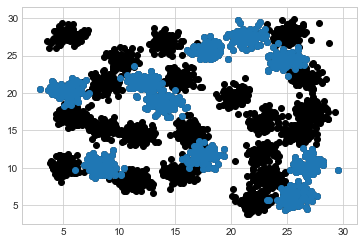

In [31]:
plt.scatter(list(data[:,0]),list(data[:,1]), c = 'black')
selecteddata = data[:1000]
plt.scatter(list(selecteddata[:,0]),list(selecteddata[:,1]), cmap='inferno')

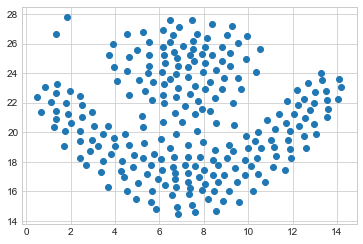

In [32]:
plt.scatter(list(dataf[:,0]),list(dataf[:,1]))

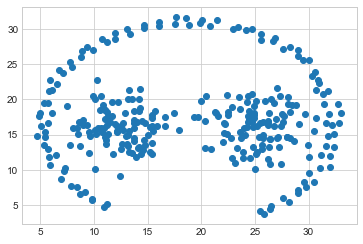

In [33]:
plt.scatter(list(datap[:,0]),list(datap[:,1]))

#### Matriz de Similaridade baseada em distância euclidiana

In [34]:
def euclidean_similarity_matrix(matrix_points):
    n = len(matrix_points)
    S = np.zeros((n,n)) 
    for i in range(n):
        for j in range(n):
            a = similarity_pair(matrix_points[i], matrix_points[j])
            S[i][j] = a
            S[j][i] = S[i][j]
    return S

def similarity_pair(x, y):    
    return 1/float(1 + euclidean(x,y))

#### Matriz de Graus

In [35]:
def degW(i,matrix):
    return sum(matrix[i][:])

def calc_D(matrix):
    n = len(matrix)
    D = np.zeros([n,n])
    for i in range(n):
        D[i][i] = degW(i,matrix)
    return D

 #### Grafo de Similaridade pelo método de k-nearest neighbor.

In [36]:
def knn_neigh_graph_matrix(k, s):
    n = len(s)
    g = np.zeros((n,n))
    k_neigh = {}
    
    for i in range(n):
        k_neigh[i] = set( np.argsort(list(s[i,:]))[-k:] )   
    
    for i in range(n):
        for j in range(n):
            if ((i in k_neigh[j]) or ( j in k_neigh[i])):
                g[i][j]= s[i][j]
                g[j][i]= s[i][j]

    return g


#### Grafo de Similaridade pelo método de epsilon neighbor.

In [37]:
def epsilon_neigh_graph_matrix(eps, s):
    n = len(s)
    g = np.zeros((n,n))
    for i in range(n):
        for j in range(n):
            if s[i][j] < eps:
                g[i][j]= s[i][j]
                g[j][i]= s[i][j]
    return g


#### Grafo de Similaridade pelo método de fully connected.

In [38]:
def fully(s):
    return s

#### Grafo Laplaciano não-normalizado

In [39]:
def unnormalized_graph_laplacian(g, s):
    D = calc_D(s)
    return D - g


In [40]:
def normalized_graph_laplacian(g, s, L):
    D = calc_D(s)
    L = np.dot((np.dot((np.power(D, -0.5)),(L))),(np.power(D, -0.5)))
    return L

In [41]:
def symmetric_normalized_laplacian(U,D):
    d = fractional_matrix_power(D,-1/2)
    return np.dot ( np.dot(d,U),d )


# Algoritmo 1 - Unormalized Spectral Clustering

In [42]:
def Unnormalized_spec_clustering(s ,k_clusters,gmethod,knn, eps):
    
    if (gmethod == 'knn_neigh'):
        g = knn_neigh_graph_matrix(knn, s)
    elif (gmethod == 'epsilon_neigh'):
        g = epsilon_neigh_graph_matrix(eps, s)
    elif (gmethod == 'fully'):
        g = fully(s)

    Unnorm_laplacian = unnormalized_graph_laplacian(g, s)  
    eig_values, eig_vectors = eigh(Unnorm_laplacian)    
    U = eig_vectors[:,0:k_clusters]  
    kmeans = KMeans(n_clusters=k_clusters)
    clust = kmeans.fit_predict(U)
    labels = kmeans.labels_

    return labels


### 1.1 - Unormalized Spectral Clustering com k-nearest neighbor graph

###### 1.1.a) dataset d31:

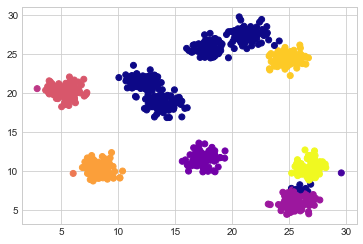

In [43]:
S_matrix = euclidean_similarity_matrix(data[:1000])
r = Unnormalized_spec_clustering(S_matrix[:1000],10,'knn_neigh', 50, 0)
x = data[:1000]
plt.scatter((x[:,0]),(x[:,1]), c = (r), cmap = 'plasma')


(0, 1)

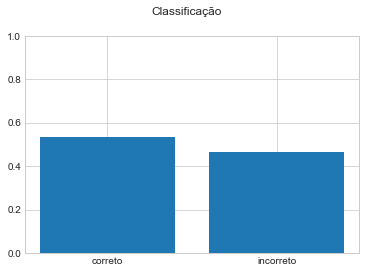

In [44]:
measure = sk.metrics.adjusted_rand_score(r,labels)
metriclabel = ['correto', 'incorreto']
metric = [measure,1-measure]
plt.bar(metriclabel,metric)
plt.suptitle('Classificação')
plt.ylim(0, 1)

###### 1.1.a) dataset flame:

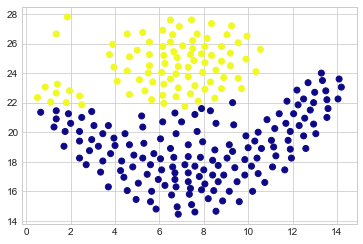

In [45]:
S_matrixf = euclidean_similarity_matrix(dataf)
rf = Unnormalized_spec_clustering(S_matrixf,2,'knn_neigh', 60, 0)
y = dataf
plt.scatter((y[:,0]),(y[:,1]), c = (rf), cmap = 'plasma')

(0, 1)

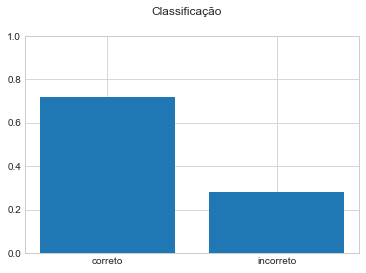

In [46]:
measuref = sk.metrics.adjusted_rand_score(rf,labelsf)
metriclabel = ['correto', 'incorreto']
metricf = [measuref,1-measuref]
plt.bar(metriclabel,metricf)
plt.suptitle('Classificação')
plt.ylim(0, 1)

###### 1.1.a) dataset pathbased:

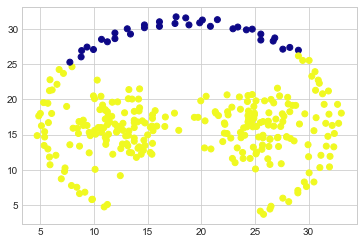

In [47]:
S_matrixp = euclidean_similarity_matrix(datap)
rp = Unnormalized_spec_clustering(S_matrixp,2,'knn_neigh', 40, 0)
y = datap
plt.scatter((y[:,0]),(y[:,1]), c = (rp), cmap = 'plasma')

(0, 1)

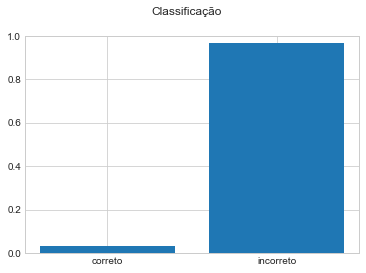

In [48]:
measurep = sk.metrics.adjusted_rand_score(rp,labelsp)
metriclabel = ['correto', 'incorreto']
metricp = [measurep,1-measurep]
plt.bar(metriclabel,metricp)
plt.suptitle('Classificação')
plt.ylim(0, 1)

### 1.2 Unormalized Spectral Clustering com epsilon neighbor graph

###### 1.2.a) dataset d31:

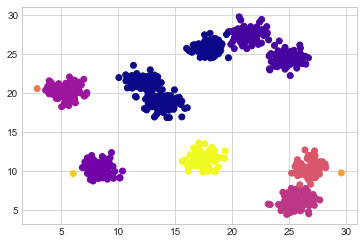

In [49]:
r = Unnormalized_spec_clustering(S_matrix,10,'epsilon_neigh', 0, 7)
x = data[:1000]
plt.scatter((x[:,0]),(x[:,1]), c = (r), cmap = 'plasma')

(0, 1)

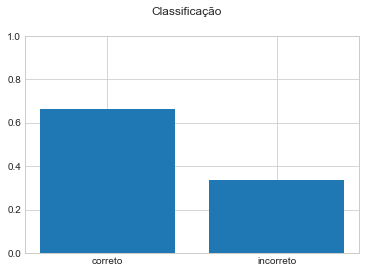

In [50]:
measured2 = sk.metrics.adjusted_rand_score(r,labels)
metriclabel = ['correto', 'incorreto']
metricd2 = [measured2,1-measured2]
plt.bar(metriclabel,metricd2)
plt.suptitle('Classificação')
plt.ylim(0, 1)

###### 1.2.b) dataset flame:

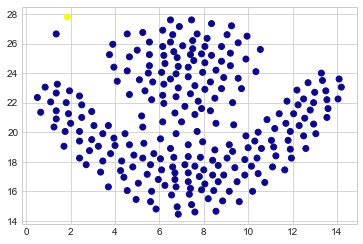

In [51]:
rf = Unnormalized_spec_clustering(S_matrixf,2,'epsilon_neigh', 0, 7)
y = dataf
plt.scatter((y[:,0]),(y[:,1]), c = (rf), cmap = 'plasma')

(0, 1)

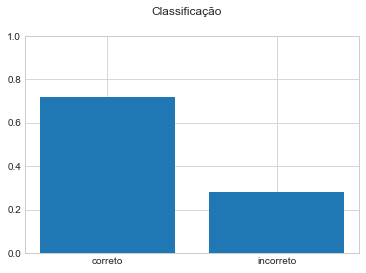

In [52]:
measuref2 = sk.metrics.adjusted_rand_score(rf,labelsf)
metriclabel = ['correto', 'incorreto']
metricf2 = [measuref2,1-measuref2]
plt.bar(metriclabel,metricf)
plt.suptitle('Classificação')
plt.ylim(0, 1)

###### 1.2.c) dataset pathbased:

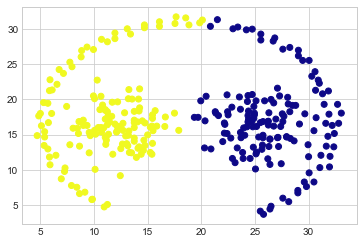

In [53]:
S_matrixp = euclidean_similarity_matrix(datap)
rp = Unnormalized_spec_clustering(S_matrixp,2,'epsilon_neigh', 0, 0.8)
y = datap
plt.scatter((y[:,0]),(y[:,1]), c = (rp), cmap = 'plasma')

(0, 1)

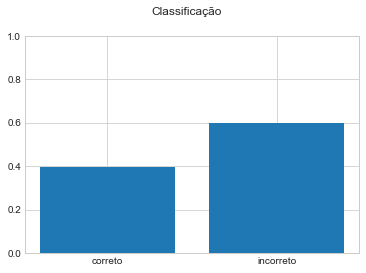

In [54]:
measurep = sk.metrics.adjusted_rand_score(rp,labelsp)
metriclabel = ['correto', 'incorreto']
metricp = [measurep,1-measurep]
plt.bar(metriclabel,metricp)
plt.suptitle('Classificação')
plt.ylim(0, 1)

### 1.3 Unormalized Spectral Clustering com k-nearest neighbor fully connected graph

###### 1.3.a) dataset d31:

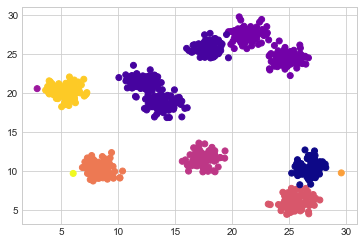

In [55]:
r = Unnormalized_spec_clustering(S_matrix[:1000],10,'fully', 0, 0)
x = data[:1000]
plt.scatter((x[:,0]),(x[:,1]), c = (r), cmap = 'plasma')

(0, 1)

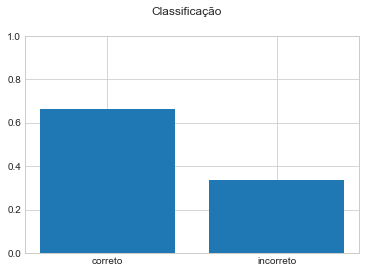

In [56]:
measured2 = sk.metrics.adjusted_rand_score(r,labels)
metriclabel = ['correto', 'incorreto']
metricd2 = [measured2,1-measured2]
plt.bar(metriclabel,metricd2)
plt.suptitle('Classificação')
plt.ylim(0, 1)

###### 1.3.b) dataset flame:

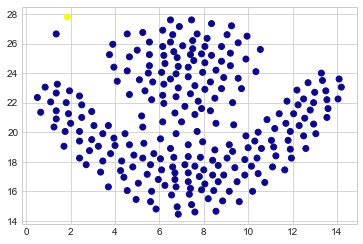

In [57]:
rf = Unnormalized_spec_clustering(S_matrixf,2,'fully', 0, 0)
y = dataf
plt.scatter((y[:,0]),(y[:,1]), c = (rf), cmap = 'plasma')

(0, 1)

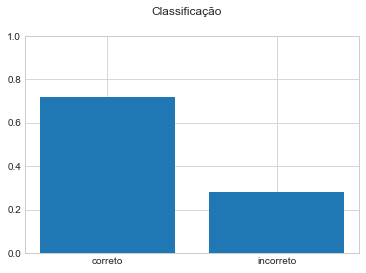

In [58]:
measuref3 = sk.metrics.adjusted_rand_score(rf,labelsf)
metriclabel = ['correto', 'incorreto']
metricf3 = [measuref3,1-measuref3]
plt.bar(metriclabel,metricf)
plt.suptitle('Classificação')
plt.ylim(0, 1)

###### 1.2.c) dataset pathbased:

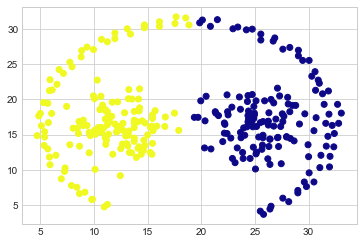

In [59]:
S_matrixp = euclidean_similarity_matrix(datap)
rp = Unnormalized_spec_clustering(S_matrixp,2,'fully', 0, 0)
y = datap
plt.scatter((y[:,0]),(y[:,1]), c = (rp), cmap = 'plasma')

(0, 1)

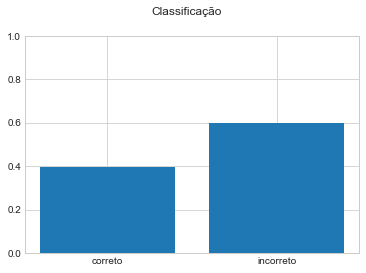

In [60]:
measurep = sk.metrics.adjusted_rand_score(rp,labelsp)
metriclabel = ['correto', 'incorreto']
metricp = [measurep,1-measurep]
plt.bar(metriclabel,metricp)
plt.suptitle('Classificação')
plt.ylim(0, 1)

# Algoritmo 2 - Normalized spectral clustering of Shi and Malik

In [61]:
def Normalized_spec_clustering_ShiMalik(s ,k_clusters,gmethod, knn, eps):
    
    if (gmethod == 'knn_neigh'):
        g = knn_neigh_graph_matrix(knn, s)
    elif (gmethod == 'epsilon_neigh'):
        g = epsilon_neigh_graph_matrix(eps, s)
    elif (gmethod == 'fully'):
        g = s
    
    D = calc_D(s)
    Unnorm_laplacian = unnormalized_graph_laplacian(g, s) 
    eig_values, eig_vectors = eigh(Unnorm_laplacian, b = D)    
    U = eig_vectors[:,0:k_clusters]
    kmeans = KMeans(n_clusters=k_clusters)
    clust = kmeans.fit_predict(U)
    labels = kmeans.labels_

    return labels


###### 2.1.a) dataset d31:

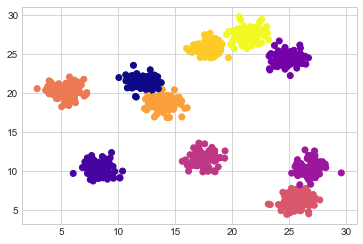

In [62]:
r = Normalized_spec_clustering_ShiMalik(S_matrix,10,'knn_neigh', 50, 0)
x = data[:1000]
plt.scatter((x[:,0]),(x[:,1]), c = (r), cmap = 'plasma')

(0, 1)

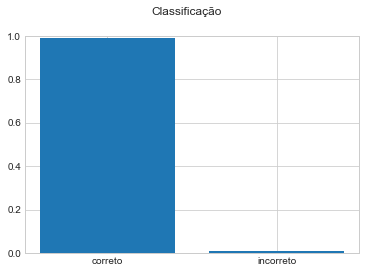

In [63]:
measured2 = sk.metrics.adjusted_rand_score(r,labels)
metriclabel = ['correto', 'incorreto']
metricd2 = [measured2,1-measured2]
plt.bar(metriclabel,metricd2)
plt.suptitle('Classificação')
plt.ylim(0, 1)

###### 2.1.b) dataset flame:

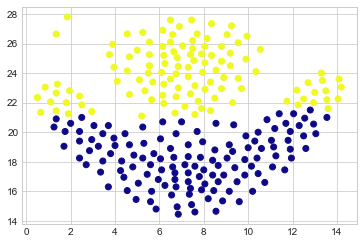

In [65]:
rf = Normalized_spec_clustering_ShiMalik(S_matrixf,2,'knn_neigh',0,3)
y = dataf
plt.scatter((y[:,0]),(y[:,1]), c = (rf), cmap = 'plasma')

(0, 1)

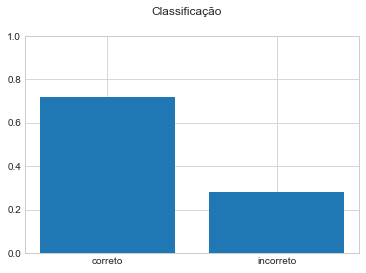

In [66]:
measuref3 = sk.metrics.adjusted_rand_score(rf,labelsf)
metriclabel = ['correto', 'incorreto']
metricf3 = [measuref3,1-measuref3]
plt.bar(metriclabel,metricf)
plt.suptitle('Classificação')
plt.ylim(0, 1)

###### 2.1.c) dataset pathbased:

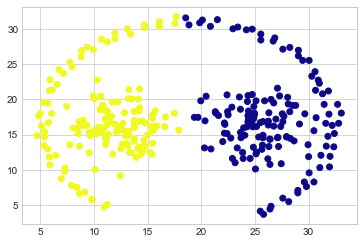

In [67]:
S_matrixp = euclidean_similarity_matrix(datap)
rp = Normalized_spec_clustering_ShiMalik(S_matrixp,2,'fully', 0, 0)
y = datap
plt.scatter((y[:,0]),(y[:,1]), c = (rp), cmap = 'plasma')

(0, 1)

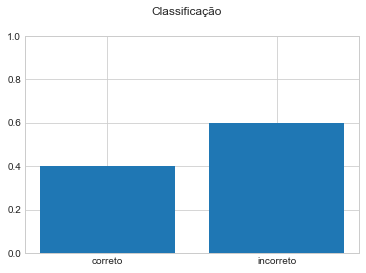

In [68]:
measurep = sk.metrics.adjusted_rand_score(rp,labelsp)
metriclabel = ['correto', 'incorreto']
metricp = [measurep,1-measurep]
plt.bar(metriclabel,metricp)
plt.suptitle('Classificação')
plt.ylim(0, 1)

###### 2.2.a) dataset d31:

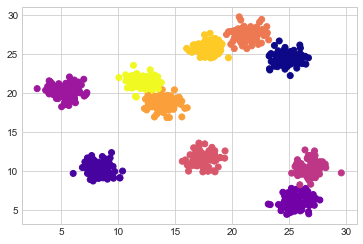

In [69]:
r = Normalized_spec_clustering_ShiMalik(S_matrix,10,'epsilon_neigh',0,3)
x = data[:1000]
plt.scatter((x[:,0]),(x[:,1]), c = (r), cmap = 'plasma')

(0, 1)

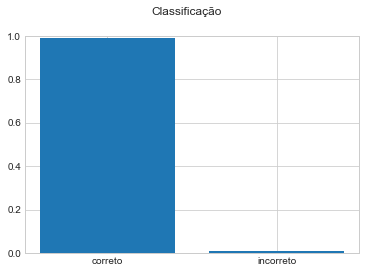

In [70]:
measured2 = sk.metrics.adjusted_rand_score(r,labels)
metriclabel = ['correto', 'incorreto']
metricd2 = [measured2,1-measured2]
plt.bar(metriclabel,metricd2)
plt.suptitle('Classificação')
plt.ylim(0, 1)

###### 2.2.b) dataset flame:

ValueError: c of shape (1000,) not acceptable as a color sequence for x with size 240, y with size 240

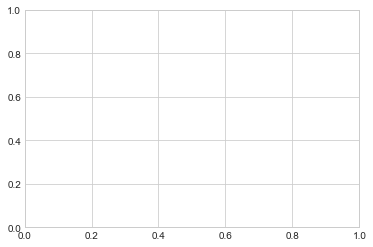

In [71]:
r = Normalized_spec_clustering_ShiMalik(S_matrix,2,'epsilon_neigh',0,2)
y = dataf
plt.scatter((y[:,0]),(y[:,1]), c = (r), cmap = 'plasma')

In [ ]:
measuref3 = sk.metrics.adjusted_rand_score(rf,labelsf)
metriclabel = ['correto', 'incorreto']
metricf3 = [measuref3,1-measuref3]
plt.bar(metriclabel,metricf)
plt.suptitle('Classificação')
plt.ylim(0, 1)

###### 2.2.c) dataset pathbased:

In [ ]:
S_matrixp = euclidean_similarity_matrix(datap)
rp = Unnormalized_spec_clustering(S_matrixp,2,'epsilon_neigh', 0, 0)
y = datap
plt.scatter((y[:,0]),(y[:,1]), c = (rp), cmap = 'plasma')

In [ ]:
measurep = sk.metrics.adjusted_rand_score(rp,labelsp)
metriclabel = ['correto', 'incorreto']
metricp = [measurep,1-measurep]
plt.bar(metriclabel,metricp)
plt.suptitle('Classificação')
plt.ylim(0, 1)

###### 2.3.a) dataset d31:

In [ ]:
r = Normalized_spec_clustering_ShiMalik(S_matrix,10,'fully')
x = data[:1000]
plt.scatter((x[:,0]),(x[:,1]), c = (r), cmap = 'plasma')

In [ ]:
measured2 = sk.metrics.adjusted_rand_score(r,labels)
metriclabel = ['correto', 'incorreto']
metricd2 = [measured2,1-measured2]
plt.bar(metriclabel,metricd2)
plt.suptitle('Classificação')
plt.ylim(0, 1)

###### 2.3.b) dataset flame:

In [ ]:
r = Normalized_spec_clustering_ShiMalik(S_matrix,2,'fully')
y = dataf
plt.scatter((y[:,0]),(y[:,1]), c = (r), cmap = 'plasma')

In [ ]:
measuref3 = sk.metrics.adjusted_rand_score(rf,labelsf)
metriclabel = ['correto', 'incorreto']
metricf3 = [measuref3,1-measuref3]
plt.bar(metriclabel,metricf)
plt.suptitle('Classificação')
plt.ylim(0, 1)

##### 2.3.c) dataset pathbased:

In [ ]:
S_matrixp = euclidean_similarity_matrix(datap)
rp = Normalized_spec_clustering_ShiMalik(S_matrixp,2,'fully', 0, 0)
y = datap
plt.scatter((y[:,0]),(y[:,1]), c = (rp), cmap = 'plasma')

In [ ]:
measurep = sk.metrics.adjusted_rand_score(rp,labelsp)
metriclabel = ['correto', 'incorreto']
metricp = [measurep,1-measurep]
plt.bar(metriclabel,metricp)
plt.suptitle('Classificação')
plt.ylim(0, 1)

# Algoritmo 3

In [84]:
def Normalized_spec_clustering_JordanWeiss(s ,k_clusters,gmethod, knn, eps):
    
    if (gmethod == 'knn_neigh'):
        g = knn_neigh_graph_matrix(knn, s)
    elif (gmethod == 'epsilon_neigh'):
        g = epsilon_neigh_graph_matrix(eps, s)
    elif (gmethod == 'fully'):
        g = fully(s)

    D = calc_D(s)
    
    Unnorm_laplacian = unnormalized_graph_laplacian(g, s)  
    Norm_laplacian = symmetric_normalized_laplacian(Unnorm_laplacian,D)

    eig_values, eig_vectors = eigh(Norm_laplacian)    
    U = eig_vectors[:,0:k_clusters]
    
    npoints = int(U.shape[0])
    T = np.zeros((npoints,U.shape[1]))
    linha = np.zeros(U.shape[1])
    norma_linha = np.zeros(U.shape[0])
    for i in range(npoints):                 
        linha = list(U[i])
        norma_linha[i] = norm(linha)        
        for j in range(U.shape[1]):
            T[i][j] = U[i][j]/norma_linha[i]
        
    kmeans = KMeans(n_clusters=k_clusters)
    clust = kmeans.fit_predict(T)
    labels = kmeans.labels_


    return labels

###### 3.1.a) dataset d31:

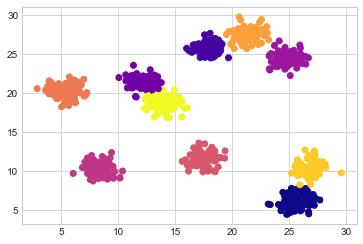

In [85]:
r = Normalized_spec_clustering_JordanWeiss(S_matrix[:1000],10,'knn_neigh',50,0)
x = data[:1000]
plt.scatter((x[:,0]),(x[:,1]), c = (r), cmap = 'plasma')

(0, 1)

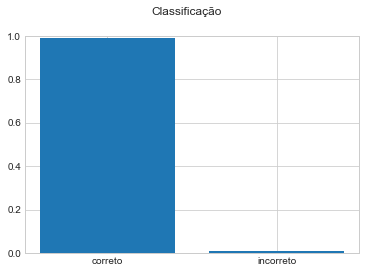

In [86]:
measured2 = sk.metrics.adjusted_rand_score(r,labels)
metriclabel = ['correto', 'incorreto']
metricd2 = [measured2,1-measured2]
plt.bar(metriclabel,metricd2)
plt.suptitle('Classificação')
plt.ylim(0, 1)

###### 3.1.b) dataset flame:

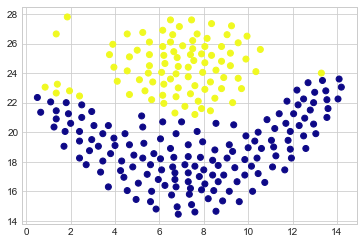

In [87]:
rf = Normalized_spec_clustering_JordanWeiss(S_matrixf,2,'knn_neigh',50, 0)
y = dataf
plt.scatter((y[:,0]),(y[:,1]), c = (rf), cmap = 'plasma')

(0, 1)

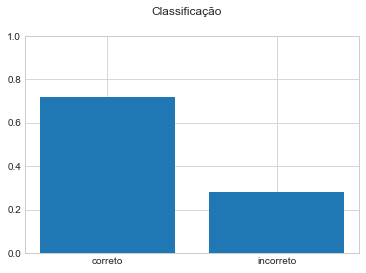

In [88]:
measuref3 = sk.metrics.adjusted_rand_score(rf,labelsf)
metriclabel = ['correto', 'incorreto']
metricf3 = [measuref3,1-measuref3]
plt.bar(metriclabel,metricf)
plt.suptitle('Classificação')
plt.ylim(0, 1)

###### 3.1.c) dataset pathbased:

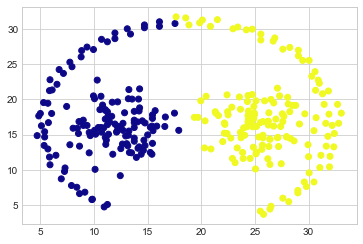

In [90]:
rp = Normalized_spec_clustering_JordanWeiss(S_matrixp,2,'epsilon_neigh',0,1)
x = datap
plt.scatter((x[:,0]),(x[:,1]), c = (rp), cmap = 'plasma')

(0, 1)

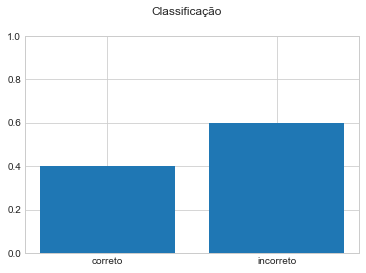

In [91]:
measurep = sk.metrics.adjusted_rand_score(rp,labelsp)
metriclabel = ['correto', 'incorreto']
metricp = [measurep,1-measurep]
plt.bar(metriclabel,metricp)
plt.suptitle('Classificação')
plt.ylim(0, 1)

###### 3.2.a) dataset d31:

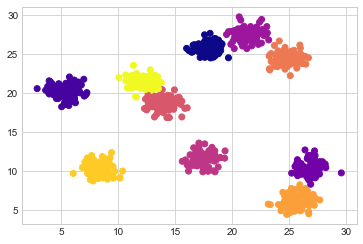

In [92]:
r = Normalized_spec_clustering_JordanWeiss(S_matrix,10,'epsilon_neigh',0,3)
x = data[:1000]
plt.scatter((x[:,0]),(x[:,1]), c = (r), cmap = 'plasma')

(0, 1)

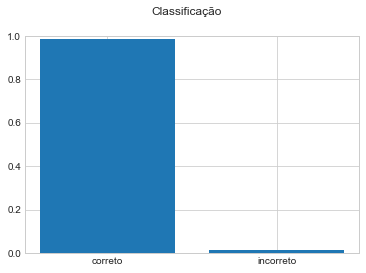

In [93]:
measured2 = sk.metrics.adjusted_rand_score(r,labels)
metriclabel = ['correto', 'incorreto']
metricd2 = [measured2,1-measured2]
plt.bar(metriclabel,metricd2)
plt.suptitle('Classificação')
plt.ylim(0, 1)

###### 3.2.b) dataset flame:

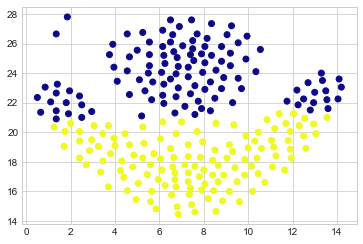

In [106]:
rf4 = Normalized_spec_clustering_JordanWeiss(S_matrixf,2,'epsilon_neigh',0,2)
y = dataf
plt.scatter((y[:,0]),(y[:,1]), c = (rf4), cmap = 'plasma')

(0, 1)

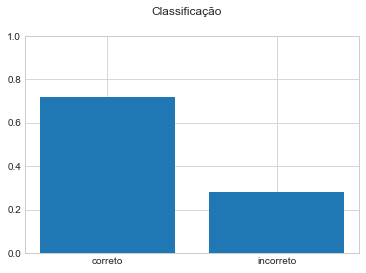

In [107]:
measuref4 = sk.metrics.adjusted_rand_score(rf4,labelsf)
metriclabel = ['correto', 'incorreto']
metricf4 = [measuref4,1-measuref4]
plt.bar(metriclabel,metricf)
plt.suptitle('Classificação')
plt.ylim(0, 1)

###### 3.2.c) dataset pathbased:

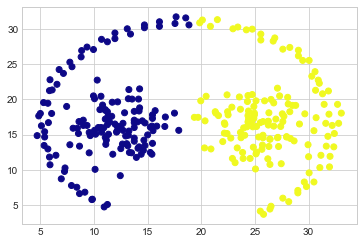

In [108]:
rp = Normalized_spec_clustering_JordanWeiss(S_matrixp,2,'epsilon_neigh', 0, 0.2)
y = datap
plt.scatter((y[:,0]),(y[:,1]), c = (rp), cmap = 'plasma')

(0, 1)

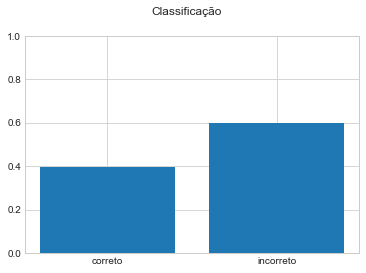

In [109]:
measurep = sk.metrics.adjusted_rand_score(rp,labelsp)
metriclabel = ['correto', 'incorreto']
metricp = [measurep,1-measurep]
plt.bar(metriclabel,metricp)
plt.suptitle('Classificação')
plt.ylim(0, 1)

###### 3.3.a) dataset d31:

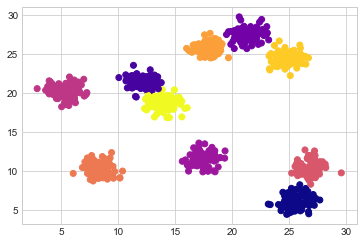

In [110]:
r = Normalized_spec_clustering_JordanWeiss(S_matrix,10,'fully',0,0)
x = data[:1000]
plt.scatter((x[:,0]),(x[:,1]), c = (r), cmap = 'plasma')

(0, 1)

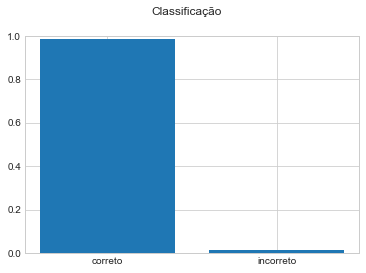

In [111]:
measured2 = sk.metrics.adjusted_rand_score(r,labels)
metriclabel = ['correto', 'incorreto']
metricd2 = [measured2,1-measured2]
plt.bar(metriclabel,metricd2)
plt.suptitle('Classificação')
plt.ylim(0, 1)

###### 3.3.b) dataset flame:

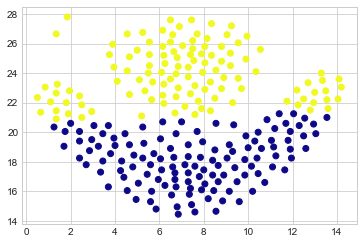

In [112]:
rf = Normalized_spec_clustering_JordanWeiss(S_matrixf,2,'fully',0,0)
y = dataf
plt.scatter((y[:,0]),(y[:,1]), c = (rf), cmap = 'plasma')

(0, 1)

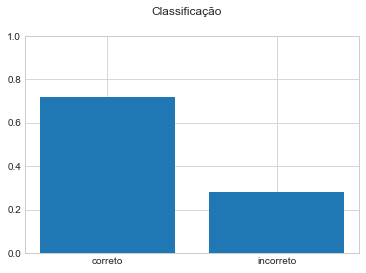

In [113]:
measuref3 = sk.metrics.adjusted_rand_score(rf,labelsf)
metriclabel = ['correto', 'incorreto']
metricf3 = [measuref3,1-measuref3]
plt.bar(metriclabel,metricf)
plt.suptitle('Classificação')
plt.ylim(0, 1)

###### 3.3.c) dataset pathbased:

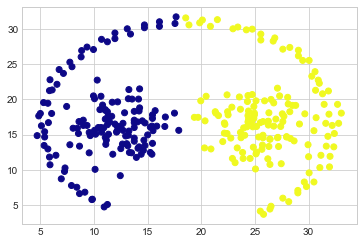

In [101]:
rp = Normalized_spec_clustering_JordanWeiss(S_matrixp,2,'fully', 0, 0)
y = datap
plt.scatter((y[:,0]),(y[:,1]), c = (rp), cmap = 'plasma')

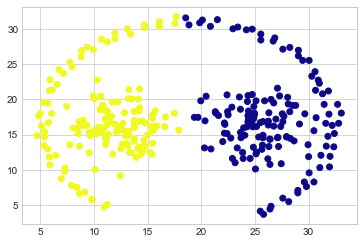

In [102]:
S_matrixp = euclidean_similarity_matrix(datap)
rp = Normalized_spec_clustering_ShiMalik(S_matrixp,2,'fully', 0, 0)
y = datap
plt.scatter((y[:,0]),(y[:,1]), c = (rp), cmap = 'plasma')